Dataset Loaded. Shape: (13611, 17)

--- Basic Data Analytics ---
Shape: (13611, 17)
Missing values:
 Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64
Class distribution:
 Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

🔁 Optimizing Sample S1...

🔁 Optimizing Sample S2...

🔁 Optimizing Sample S3...

🔁 Optimizing Sample S4...

🔁 Optimizing Sample S5...

🔁 Optimizing Sample S6...

🔁 Optimizing Sample S7...

🔁 Optimizing Sample S8...

🔁 Optimizing Sample S9...

🔁 Optimizing Sample S10...

📊 Final Results:
Sample | Best Accuracy (%) | Kernel | Nu | Epsilon
S1 | 91.97 | rbf 

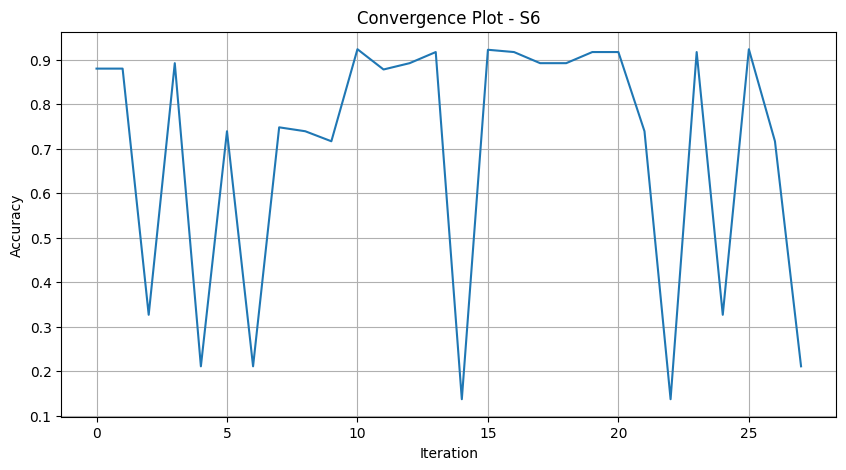


✅ All Done. Results and plot saved.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import random


df = pd.read_excel('/content/Dry_Bean_Dataset.xlsx')  # Replace with exact filename if different
print("Dataset Loaded. Shape:", df.shape)

# 2. Basic Data Analytics
print("\n--- Basic Data Analytics ---")
print("Shape:", df.shape)
print("Missing values:\n", df.isnull().sum())
print("Class distribution:\n", df['Class'].value_counts())

# Encode target labels
label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])

# Feature-target split
X = df.drop('Class', axis=1)
y = df['Class']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optimization setup
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
nu_values = np.linspace(0.01, 1, 10)
epsilon_values = np.linspace(0.01, 1, 10)

# Store results
results = []
convergence_data = {}

# 4. Run for 10 samples
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.3, random_state=i
    )

    best_acc = 0
    best_params = {}
    accuracy_list = []

    print(f"\n🔁 Optimizing Sample S{i+1}...")

    for iteration in range(100):
        kernel = random.choice(kernels)
        nu = round(random.choice(nu_values), 2)
        epsilon = round(random.choice(epsilon_values), 2)

        model = svm.NuSVC(kernel=kernel, nu=nu)
        try:
            model.fit(X_train, y_train)
            preds = model.predict(X_test)
            acc = accuracy_score(y_test, preds)

            accuracy_list.append(acc)

            if acc > best_acc:
                best_acc = acc
                best_params = {
                    'Kernel': kernel,
                    'Nu': nu,
                    'Epsilon': epsilon
                }
        except:
            continue

    results.append({
        'Sample': f'S{i+1}',
        'Best Accuracy': round(best_acc * 100, 2),
        'Best Params': best_params
    })

    convergence_data[f'S{i+1}'] = accuracy_list

# Print Results
print("\n📊 Final Results:")
print("Sample | Best Accuracy (%) | Kernel | Nu | Epsilon")
for res in results:
    p = res['Best Params']
    print(f"{res['Sample']} | {res['Best Accuracy']} | {p['Kernel']} | {p['Nu']} | {p['Epsilon']}")

# Plot convergence of best sample
best_sample = max(results, key=lambda x: x['Best Accuracy'])
sample_id = best_sample['Sample']
plt.figure(figsize=(10, 5))
plt.plot(convergence_data[sample_id])
plt.title(f'Convergence Plot - {sample_id}')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Save results to CSV
df_results = pd.DataFrame(results)
df_results.to_csv("dry_bean_svm_results.csv", index=False)

print("\n✅ All Done. Results and plot saved.")


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table  # For table customization

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 4))  # Adjust size as needed
ax.axis('off')  # Hide axes

# Render the DataFrame as a table
table = plt.table(
    cellText=df_results.values,
    colLabels=df_results.columns,
    rowLabels=df_results.index,
    cellLoc='center',
    loc='center',
    bbox=[0, 0, 1, 1]  # Adjust table size within figure
)

# Style the table (optional)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Scale cell sizes

# Save as PNG
plt.savefig('df_results.png', dpi=300, bbox_inches='tight')
plt.close()

print("DataFrame saved as 'df_results.png'")

DataFrame saved as 'df_results.png'
